In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

(662, 1000, 3)


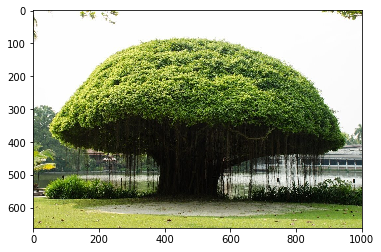

In [2]:
path = 'C:\\David\\dark_tree.jpg'

imag = cv2.imread(path)
print(imag.shape)

plt.imshow(imag[:,:,::-1], interpolation= 'none')
plt.show()

In [3]:
# define a gamma function to transform the imag to a new distribution
def gamma_transform(imag, gamma):
    table = np.array([((x/255)**gamma)*255 for x in range(256)]).astype('uint8')
    return cv2.LUT(imag, table)

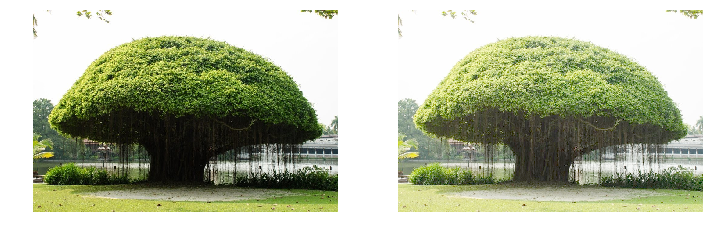

In [4]:
# cv2.calcHist(images, channels, mask, histSize, ranges)
#cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)

# 影像：影像的來源，其型別可以是 uint8 或 float32，變數必須放在中括號當中，例如：[img]。
# 通道：指定影像的通道（channel），同樣必須放在中括號當中。若為灰階影像，則通道就要指定為 [0]，若為彩色影像則可用 [0]、[1] 或 [2] 指定 藍色、綠色或紅色的通道。
# 遮罩：以遮罩指定要納入計算的圖形區域，若指定為 None 則會計算整張圖形的所有像素。
# 區間數量：指定直方圖分隔區間的數量（bins），也就是圖形畫出來要有幾條長方形。
# 數值範圍：指定要計算的像素值範圍，通常都是設為 [0,256]（計算所有的像素值）。

imag_his_b = cv2.calcHist(imag, [0], None, [256], [0,256])
imag_his_g = cv2.calcHist(imag, [1], None, [256], [0,256])
imag_his_r = cv2.calcHist(imag, [2], None, [256], [0,256])

imag_enhanced = gamma_transform(imag, 0.5)

imag_enhanced_b = cv2.calcHist(imag_enhanced, [0], None, [256], [0,256])
imag_enhanced_g = cv2.calcHist(imag_enhanced, [1], None, [256], [0,256])
imag_enhanced_r = cv2.calcHist(imag_enhanced, [2], None, [256], [0,256])

imag_list = [imag, imag_enhanced]

plt.figure(figsize=(12,6))
for sub_p, im in zip([121,122],imag_list):
    plt.subplot(sub_p)
    plt.imshow(im[:,:,::-1], interpolation = 'none')
    plt.axis('off')

plt.show()

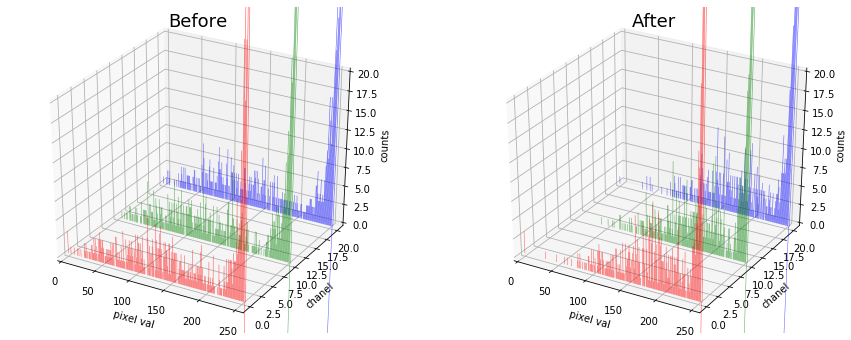

In [5]:
# plot the 3-D distribution of each chanel before and after the transformation
his_lists = [[imag_his_b.ravel(),imag_his_g.ravel(),imag_his_r.ravel()],
             [imag_enhanced_b.ravel(),imag_enhanced_g.ravel(),imag_enhanced_r.ravel()]]
title_list = ['Before', 'After']


fig = plt.figure(figsize=(15,6))

for sub_p, his_list, title in zip([121,122],his_lists, title_list):
    ax = fig.add_subplot(sub_p, projection = '3d')
    for c, z , chanel in zip(['b','g','r'], [20,10,0], his_list):
        ax.bar(range(256), chanel, zs = z, zdir = 'y', color = [c]*256 , alpha = 0.6, edgecolor = 'none',lw = 0)
    ax.set_xlabel('pixel val')
    ax.set_ylabel('chanel')
    ax.set_zlabel('counts')
    ax.set_xlim(0,256)
    ax.set_zlim(0,20)
    ax.set_title(title, fontsize = 18)
    
plt.show()